# <center> Missing values + outliers - Detection and Treatment + MORE 😁 <center>

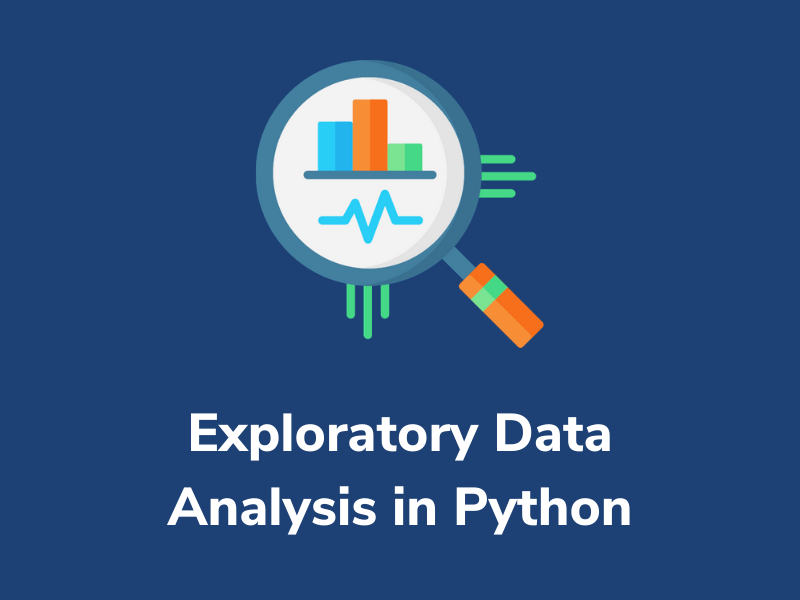

## Dataset Description

### Dataset Link - https://drive.google.com/file/d/1GtwjrZpP6jiZWXyYShiMHBamUstFgaEF/view

### 
The Adult dataset is from the Census Bureau and the task is to a year based attributes such as education, hours of work per week, etc..

The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

Age

Workclass

Final Weight

Education

Education Number of Years

Marital-status

Occupation

Relationship

Race

Sex

Capital-gain

Capital-loss

Hours-per-week

Native-country

There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

The dataset contains missing values that are marked with a question mark character (?).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats 

%matplotlib inline

In [3]:
df = pd.read_csv('/home/durgesh/Desktop/Innomatics Data Science intern/Data Analysis/EDA+Missing Values/adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [6]:
category_column =['workclass', 'race', 'education','marital-status', 'occupation','relationship', 'gender', 'native-country']


In [7]:
numeric_column=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week']

In [8]:
df.workclass.replace('?',df.workclass.mode()[0],inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.occupation.replace('?',df.occupation.mode()[0],inplace=True)

In [10]:
df['native-country'].replace('?',df['native-country'].mode()[0],inplace=True)

## Univariate Analysis

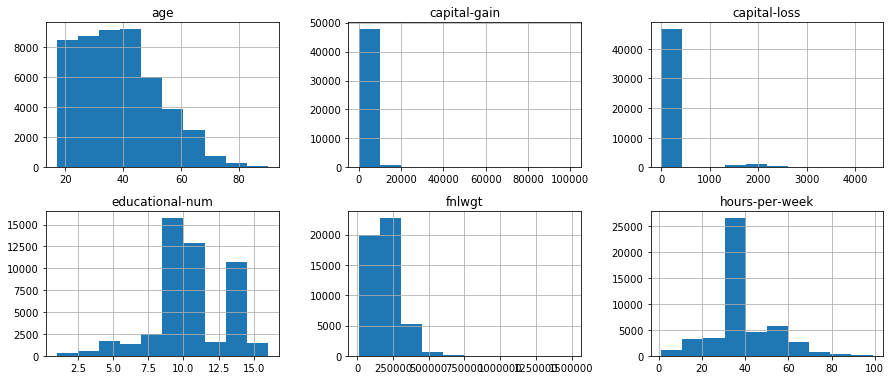

In [11]:
df[numeric_column].hist(figsize=(15, 20), layout=(6, 3));

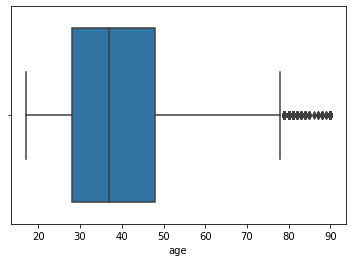

In [13]:
sns.boxplot(x='age',data=df)

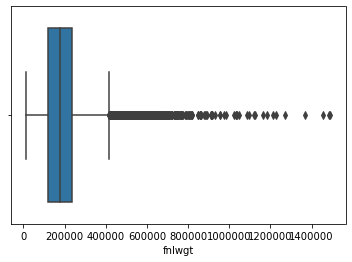

In [14]:
sns.boxplot(x='fnlwgt',data=df)

#### From above graph we can see that there are lots of outliers in fnlwgt column

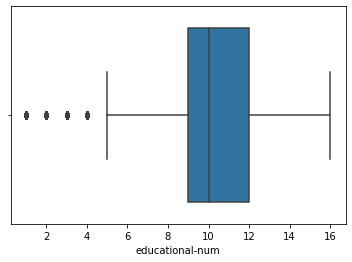

In [16]:
sns.boxplot(x='educational-num',data=df)

### here, few lower outliers in educational-num column as compare to previous one.

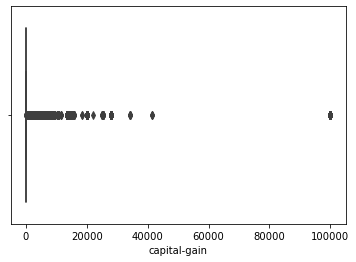

In [17]:
sns.boxplot(x='capital-gain',data=df)

### there are alot of outliers in capital-gain column

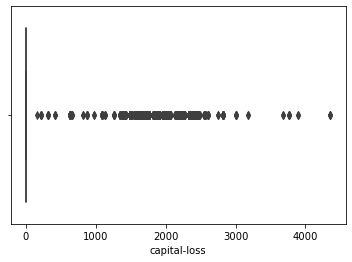

In [19]:
sns.boxplot(x='capital-loss',data=df)

### there are also alot of outliers in capital-loss column

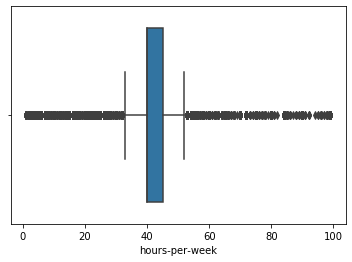

In [20]:
sns.boxplot(x='hours-per-week',data=df)

### here, we can see that the numerical features have very different ranges for that we need to normalize or standardize the data, and we need to convert categorical column into numeric using some encoding techniques or dummy variables

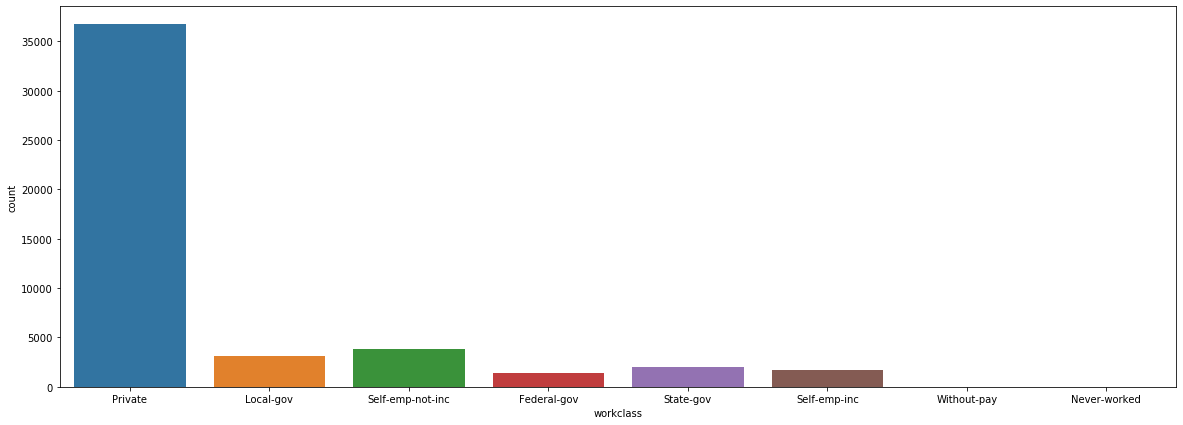

In [22]:
plt.figure(figsize=(20,7))
sns.countplot(x='workclass',data=df)

### Here we can see that there are more people working in the private sector

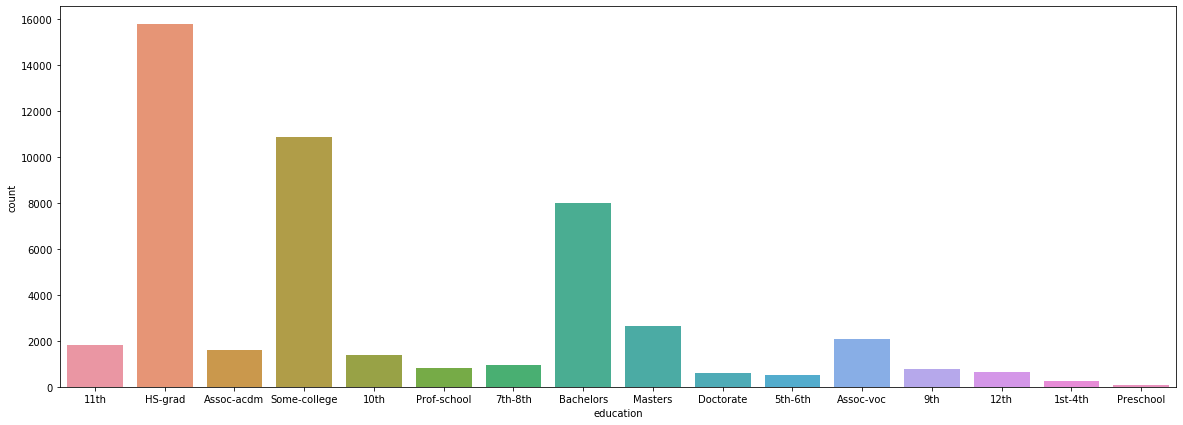

In [23]:
plt.figure(figsize=(20,7))
sns.countplot(x='education',data=df)

### here we can see that there are more people who have done Hs grad

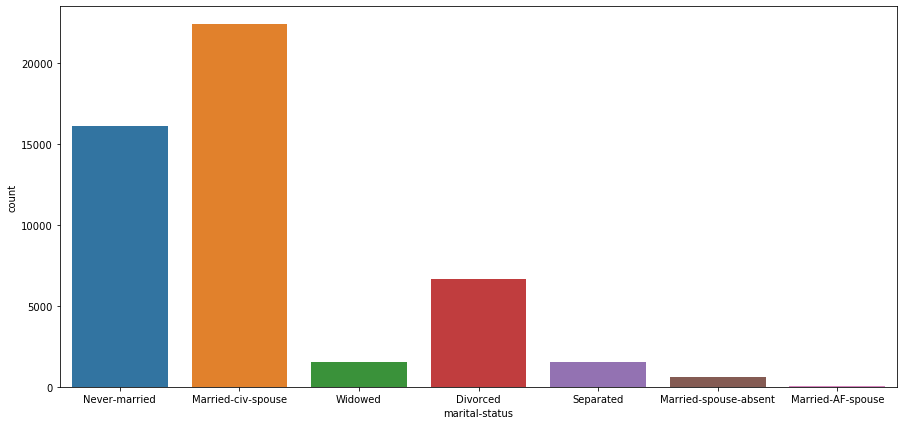

In [25]:
plt.figure(figsize=(15,7))
sns.countplot(x='marital-status',data=df)

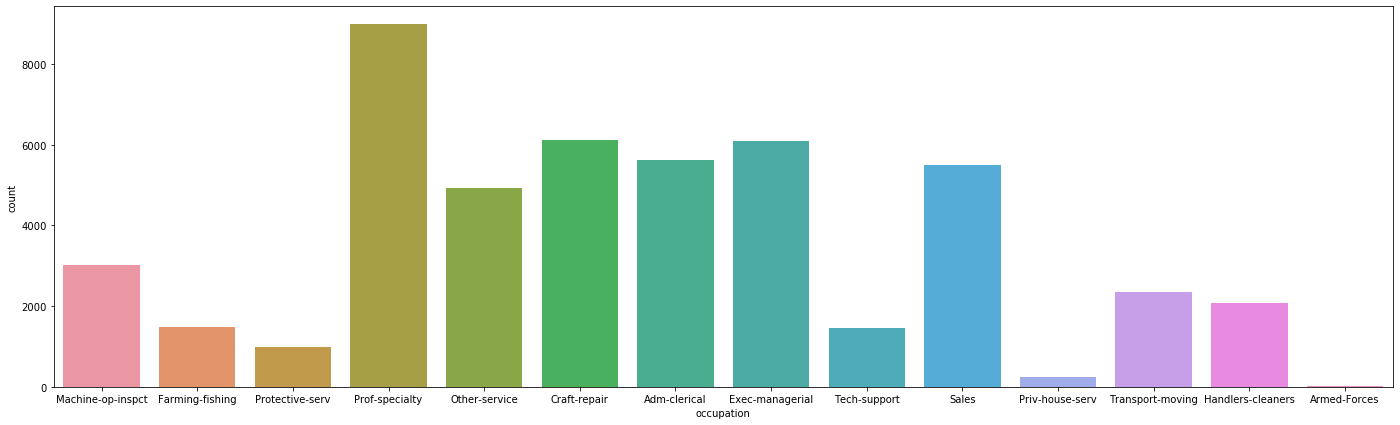

In [26]:
plt.figure(figsize=(24,7))
sns.countplot(x='occupation',data=df)

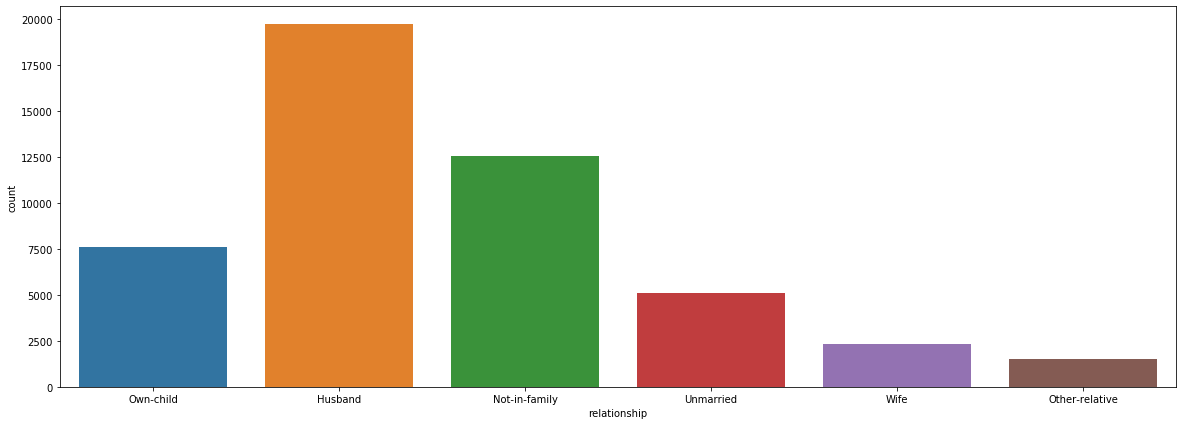

In [27]:
plt.figure(figsize=(20,7))
sns.countplot(x='relationship',data=df)

### here we can see that there are more husbands being listed

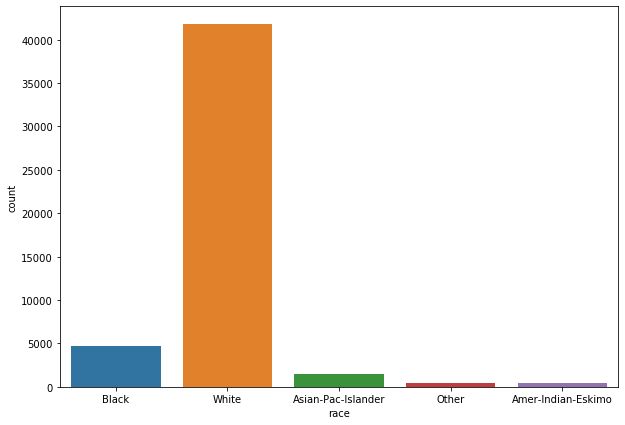

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x='race',data=df)

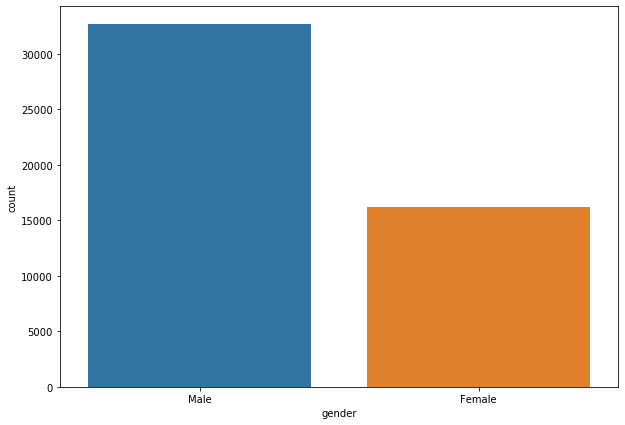

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',data=df)

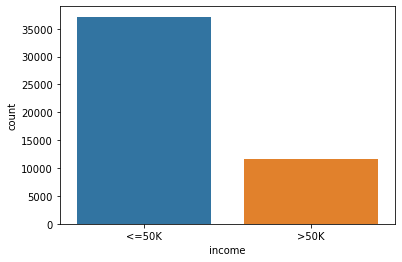

In [30]:
sns.countplot(x='income',data=df)

## Bivariate Analysis

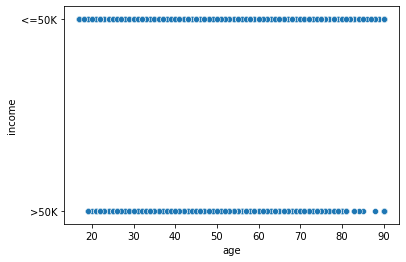

In [31]:
sns.scatterplot(x='age',y='income',data=df)

### we can see that there is nothing like as age increase salary increases. The people with lower age also has >50k salary

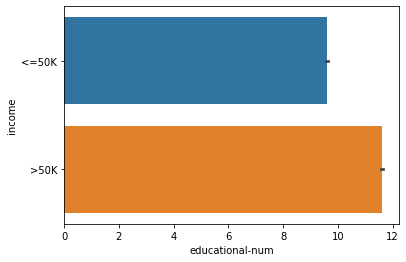

In [32]:
sns.barplot(x='educational-num',y='income',data=df)

### this graph describes the chances of higher salary is more with more number of years of education, may not be true in all cases.

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


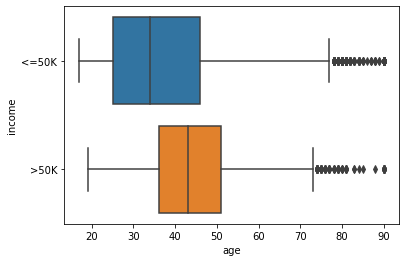

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


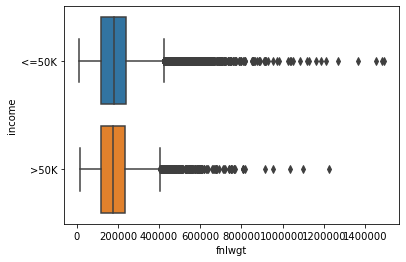

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


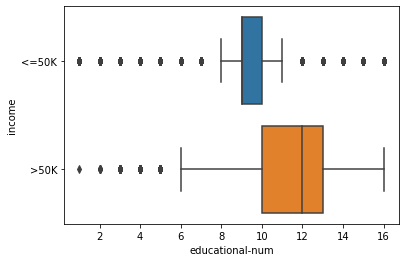

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


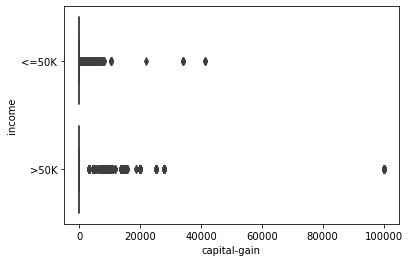

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


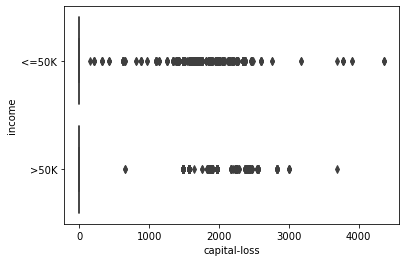

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


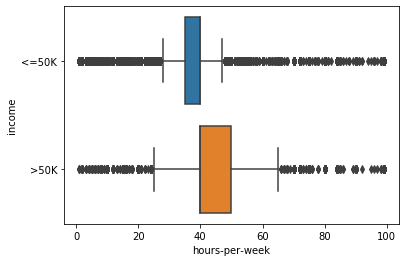

In [33]:
for i in numeric_column:
    sns.boxplot(df[i],y=df['income'])
    plt.show()

### Insights
In the above graphs we can observe that only educational-num graph has less outliers

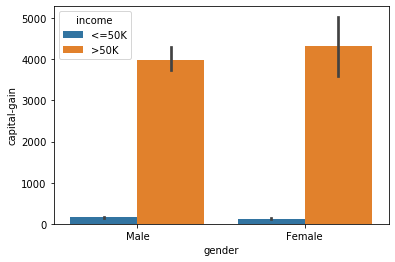

In [34]:
sns.barplot(x='gender',y='capital-gain',hue='income',data=df)

### here we can say that there is a linear relationship between capital-gain and income, in addition to that the people who has higher capital-gain has more income as compared to the people has lower capital-gain.

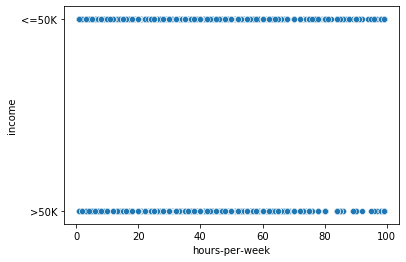

In [35]:
sns.scatterplot(x='hours-per-week',y='income',data=df)

### Insights
from above graph we can say that there is nothing like the people who work for more hour get high salary.

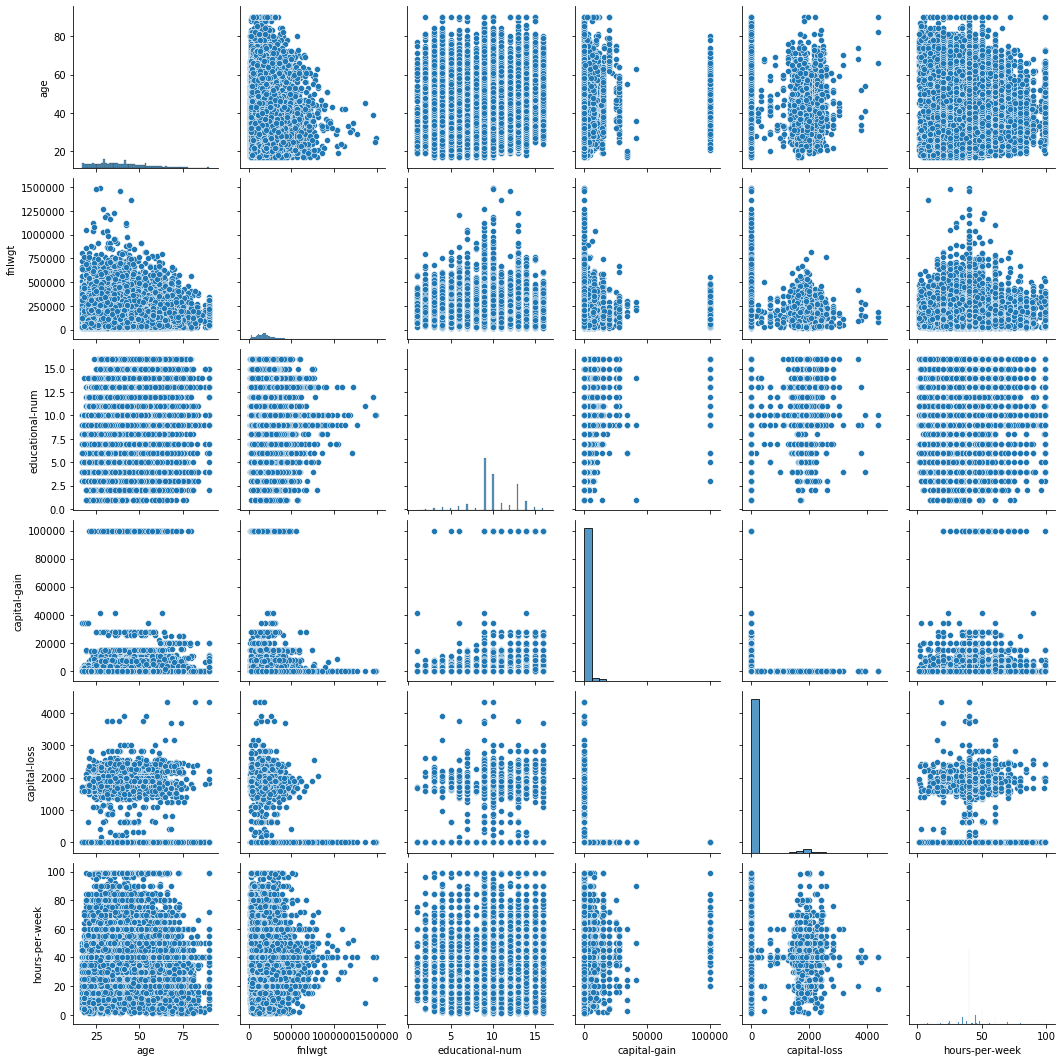

In [36]:
sns.pairplot(df)

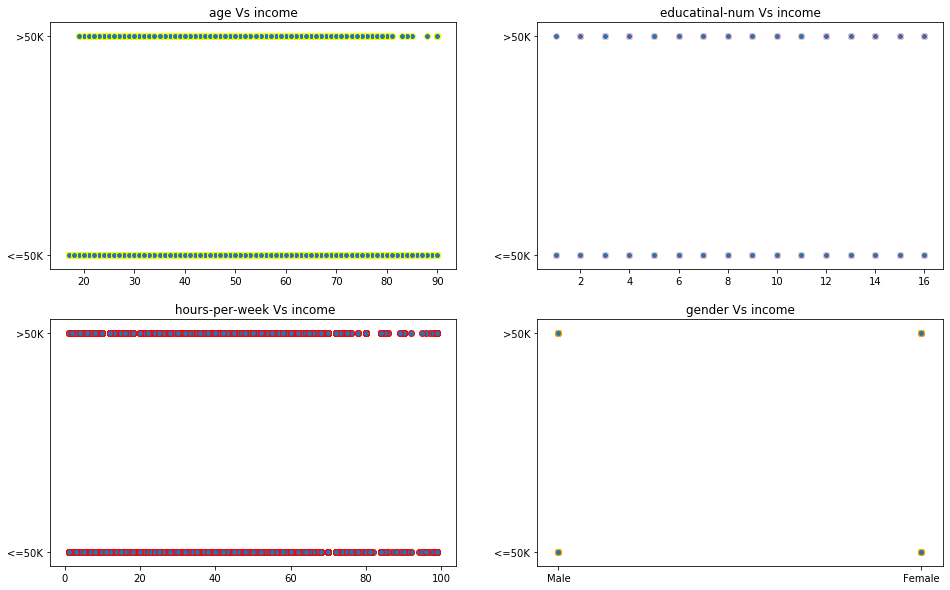

In [37]:
plt.figure(figsize=(16,10))


plt.subplot(2,2,1)
plt.scatter(df['age'],df['income'], edgecolors='yellow')
plt.title('age Vs income');


plt.subplot(2,2,2)
plt.scatter(df['educational-num'], df['income'], edgecolors='pink')
plt.title('educatinal-num Vs income');


plt.subplot(2,2,3)
plt.scatter(df['hours-per-week'],df['income'], edgecolors='red')
plt.title(' hours-per-week Vs income');

plt.subplot(2,2,4)
plt.scatter(df['gender'],df['income'], edgecolors='orange')
plt.title('gender Vs income');


plt.show()

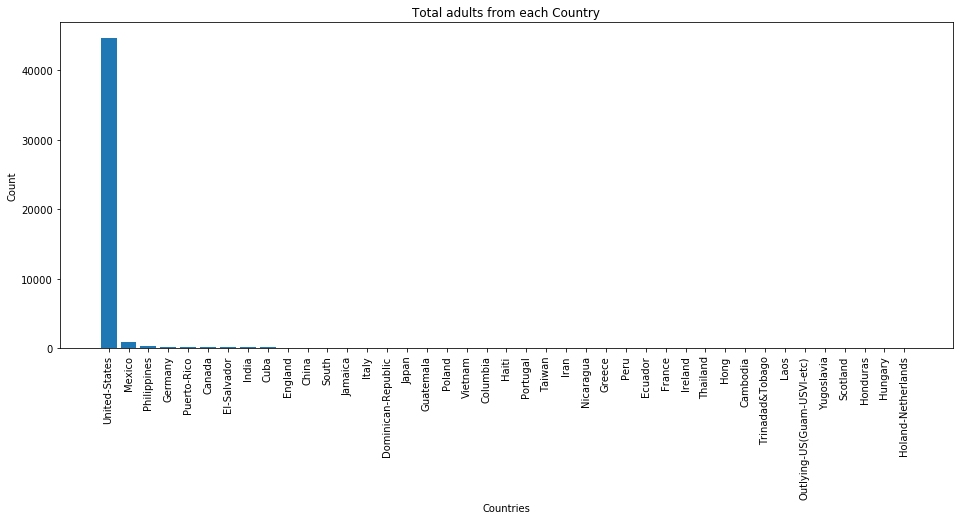

In [38]:
country_count = df['native-country'].value_counts()

plt.figure(figsize=(16,6))
plt.bar(country_count.index, country_count.values);
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country');

### Insights
The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other.

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


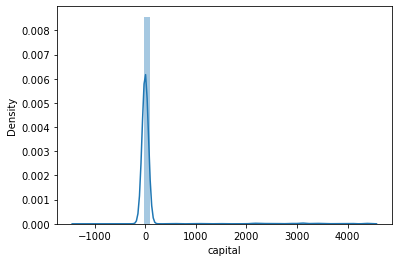

In [39]:
df = df[(stats.zscore(df['capital-gain'])>-3) & (stats.zscore(df['capital-gain'])<3)]
df = df[(stats.zscore(df['capital-loss'])>-3) & (stats.zscore(df['capital-loss'])<3)]
df['capital'] = df['capital-gain'] - df['capital-loss']
lim=np.percentile(df['capital'],95)
df = df[df['capital'] <= lim] 
sns.distplot(df['capital'])

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


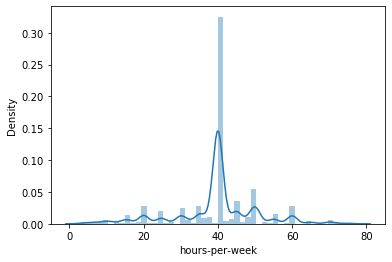

In [40]:
df = df[(stats.zscore(df['hours-per-week'])>-3) & (stats.zscore(df['hours-per-week'])<3)]
sns.distplot(df['hours-per-week'])

/home/durgesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


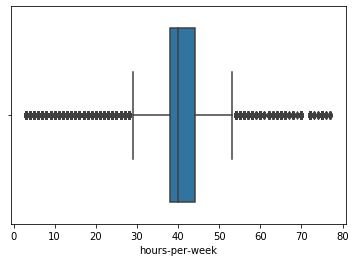

In [41]:
sns.boxplot(df['hours-per-week'])

In [42]:
X = df.drop(['income'], axis = 1)
X = pd.get_dummies(X)
y = df['income']

## Machine Learning Models

#### Logistic Regression

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = lr.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [60]:
 from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_test,y_pred)

array([[10598,     0],
       [ 2434,     0]])

In [66]:
lr.score(X_test,y_test)

0.8132289748311847

## Compare All Models

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Naive Bayes

In [72]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_train_nb = nb.predict(X_train)
print('Accuracy:',accuracy_score(y_train,y_train_nb))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_nb))

Accuracy: 0.8067157797803065
Confusion matrix:
 [[22117  2582]
 [ 3295  2412]]


In [73]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,y_pred_nb))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_nb))

Accuracy:  0.8033302639656231
Confusion matrix: 
 [[9472 1126]
 [1437  997]]


### KNN

In [74]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_knn  = knn.predict(X_train)
print('Accuracy:',accuracy_score(y_train,y_train_knn))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_knn))

Accuracy: 0.8375320660395974
Confusion matrix:
 [[23851   848]
 [ 4092  1615]]


In [75]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn  = knn.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_knn))

Accuracy: 0.7894413750767342
Confusion matrix: 
 [[9955  643]
 [2101  333]]


### Decision Tree

In [76]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_train_dtree = tree.predict(X_train)
print('Accuracy:',accuracy_score(y_train,y_train_dtree))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_dtree))

Accuracy: 0.9999013352627771
Confusion matrix:
 [[24699     0]
 [    3  5704]]


In [77]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_tree))
print('Confusion matrix:\n',confusion_matrix(y_test,y_pred_tree))

Accuracy: 0.8025629220380601
Confusion matrix:
 [[9253 1345]
 [1228 1206]]


### Random Forest

In [78]:
r = RandomForestClassifier(n_estimators=100, criterion='entropy')
r.fit(X_train,y_train)
y_train_r = r.predict(X_train)
print('Accuracy: ',accuracy_score(y_train,y_train_r))
print('Confusion matrix:\n',confusion_matrix(y_train,y_train_r))

Accuracy:  0.9998684470170361
Confusion matrix:
 [[24698     1]
 [    3  5704]]


In [79]:
r = RandomForestClassifier(n_estimators=100, criterion='entropy')
r.fit(X_train,y_train)
y_pred_r = r.predict(X_test)
print('Accuracy:',accuracy_score(y_test,y_pred_r))
print('Confusion matrix: \n',confusion_matrix(y_test,y_pred_r))

Accuracy: 0.8457642725598526
Confusion matrix: 
 [[9824  774]
 [1236 1198]]


### Random Forest is best algorithm for Predecting the Income

## Comparing Models

In [80]:
print('Logistic Regression')
print('Accuracy:',accuracy_score(y_test,y_pred))

print('Naive Bayes')
print('Accuracy:',accuracy_score(y_test,y_pred_nb))

print('KNN')
print('Accuracy:',accuracy_score(y_test,y_pred_knn))

print('Decision Tree')
print('Accuracy:',accuracy_score(y_test,y_pred_tree))

print('Random Forest')
print('Accuracy:',accuracy_score(y_test,y_pred_r))

Logistic Regression
Accuracy: 0.8132289748311847
Naive Bayes
Accuracy: 0.8033302639656231
KNN
Accuracy: 0.7894413750767342
Decision Tree
Accuracy: 0.8025629220380601
Random Forest
Accuracy: 0.8457642725598526


### here we can observe that Random forest algorithm is more accurate compared to the other four algorithms